In [2]:
import numpy as np
import pandas as pd

### Data Preparation
The preprocess includes xxxxxx

In [3]:
# Load data from csv file
df = pd.read_csv('nytaxi2022.csv')

/var/folders/8p/3d218n_n0_d_80_262nzz8rh0000gn/T/ipykernel_67091/1126275083.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nytaxi2022.csv')


In [4]:
# Inspect data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39656098 entries, 0 to 39656097
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 5.6+ GB


In [5]:
# Inspect data head
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,01/01/2022 12:35:40 AM,01/01/2022 12:53:29 AM,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,01/01/2022 12:33:43 AM,01/01/2022 12:42:07 AM,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,01/01/2022 12:53:21 AM,01/01/2022 01:02:19 AM,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,01/01/2022 12:25:21 AM,01/01/2022 12:35:23 AM,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,01/01/2022 12:36:48 AM,01/01/2022 01:14:20 AM,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [ ]:
# Define selected columns
selected_cols = [
    "trip_duration",
    "passenger_count",
    "trip_distance",
    "RatecodeID",
    "PULocationID",
    "DOLocationID",
    "payment_type",
    "extra",
    "total_amount"
]

df = df[selected_cols]
df.info()

In [6]:
# Check for missing values
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1368303
trip_distance                  0
RatecodeID               1368303
store_and_fwd_flag       1368303
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1368303
airport_fee              1368303
dtype: int64

In [7]:
# Drop rows with missing values
df.dropna()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,01/01/2022 12:35:40 AM,01/01/2022 12:53:29 AM,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,01/01/2022 12:33:43 AM,01/01/2022 12:42:07 AM,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,01/01/2022 12:53:21 AM,01/01/2022 01:02:19 AM,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,01/01/2022 12:25:21 AM,01/01/2022 12:35:23 AM,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,01/01/2022 12:36:48 AM,01/01/2022 01:14:20 AM,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529630,2,12/31/2022 11:36:15 PM,12/31/2022 11:52:36 PM,1.0,4.02,1.0,N,233,7,1,19.8,1.0,0.5,4.96,0.0,1.0,29.76,2.5,0.0
39529631,2,12/31/2022 11:09:34 PM,12/31/2022 11:17:46 PM,1.0,1.12,1.0,N,161,142,1,8.6,1.0,0.5,0.00,0.0,1.0,13.60,2.5,0.0
39529632,2,12/31/2022 11:39:06 PM,12/31/2022 11:51:55 PM,1.0,1.81,1.0,N,161,141,1,12.8,1.0,0.5,4.45,0.0,1.0,22.25,2.5,0.0
39529633,2,12/31/2022 11:09:37 PM,12/31/2022 11:23:07 PM,1.0,2.35,1.0,N,229,142,2,14.9,1.0,0.5,0.00,0.0,1.0,19.90,2.5,0.0


In [8]:
# Check for duplicates
df.duplicated().sum()

np.int64(1)

In [9]:
# Drop duplicate rows
df.drop_duplicates()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,01/01/2022 12:35:40 AM,01/01/2022 12:53:29 AM,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,01/01/2022 12:33:43 AM,01/01/2022 12:42:07 AM,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,01/01/2022 12:53:21 AM,01/01/2022 01:02:19 AM,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,01/01/2022 12:25:21 AM,01/01/2022 12:35:23 AM,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,01/01/2022 12:36:48 AM,01/01/2022 01:14:20 AM,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39656093,2,12/31/2022 11:46:00 PM,01/01/2023 12:11:00 AM,NaN,11.56,NaN,NaN,16,36,0,39.55,0.0,0.5,8.21,0.0,1.0,49.26,NaN,NaN
39656094,2,12/31/2022 11:13:24 PM,12/31/2022 11:29:08 PM,NaN,5.06,NaN,NaN,75,50,0,26.23,0.0,0.5,0.00,0.0,1.0,30.23,NaN,NaN
39656095,2,12/31/2022 11:00:49 PM,12/31/2022 11:26:57 PM,NaN,13.35,NaN,NaN,168,197,0,47.73,0.0,0.5,9.85,0.0,1.0,59.08,NaN,NaN
39656096,1,12/31/2022 11:02:50 PM,12/31/2022 11:16:05 PM,NaN,0.00,NaN,NaN,238,116,0,12.74,0.0,0.5,0.00,0.0,1.0,16.74,NaN,NaN


In [10]:
# Convert datetime columns (pickup_ts & dropoff_ts) to timestamps (in seconds)
df['pickup_ts'] = pd.to_datetime(df['tpep_pickup_datetime']).astype(np.int64) // 10**9
df['dropoff_ts'] = pd.to_datetime(df['tpep_dropoff_datetime']).astype(np.int64) // 10**9

# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff_ts'] - df['pickup_ts']) / 60.0

/var/folders/8p/3d218n_n0_d_80_262nzz8rh0000gn/T/ipykernel_67091/496245504.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['pickup_ts'] = pd.to_datetime(df['tpep_pickup_datetime']).astype(np.int64) // 10**9
/var/folders/8p/3d218n_n0_d_80_262nzz8rh0000gn/T/ipykernel_67091/496245504.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['dropoff_ts'] = pd.to_datetime(df['tpep_dropoff_datetime']).astype(np.int64) // 10**9


In [ ]:
# Filter out rows with non-positive values in columns (trip_duration, trip_distance, passenger_count, extra, total_amount)
df = df[
    (df['trip_duration'] > 0) &
    (df['trip_distance'] > 0) &
    (df['passenger_count'] > 0) &
    (df['extra'] >= 0) &
    (df['total_amount'] > 0)
]

df.shape()

<class 'pandas.core.frame.DataFrame'>
Index: 36816758 entries, 0 to 39529634
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  airport_fee            float64
 19  pickup_ts              int64  
 20  dropoff_ts             int64  
 21  trip_duration          float64
dtypes: float64(13), int64

### EDA (Exploratory Data Analysis)
EDA is perfrom to learn basice distributions and replationships between data, and remove outliers if necessary to improve data performance

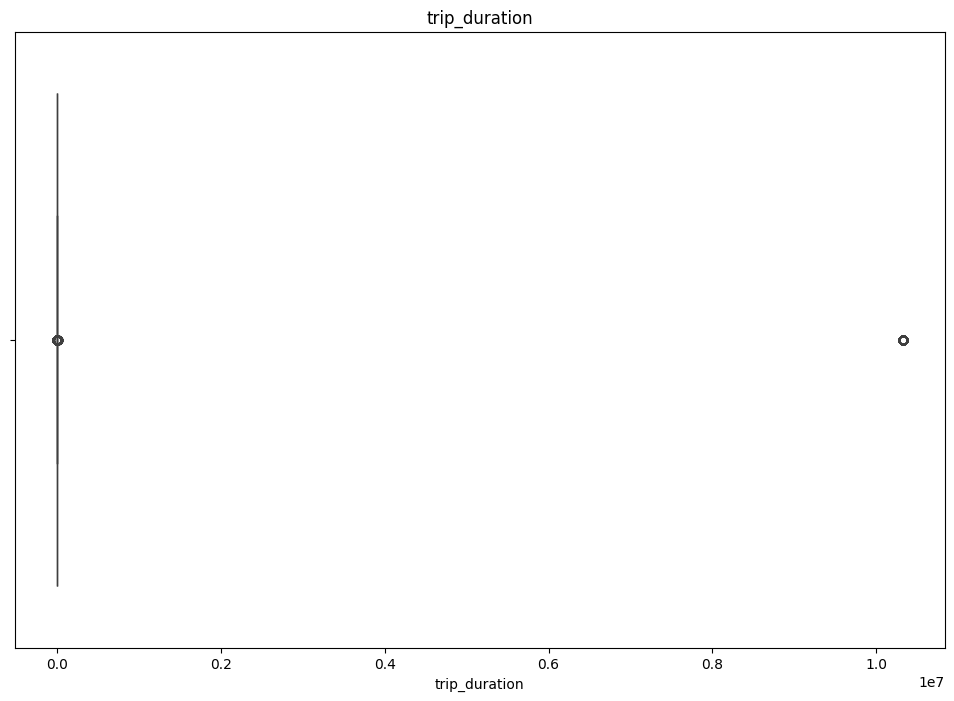

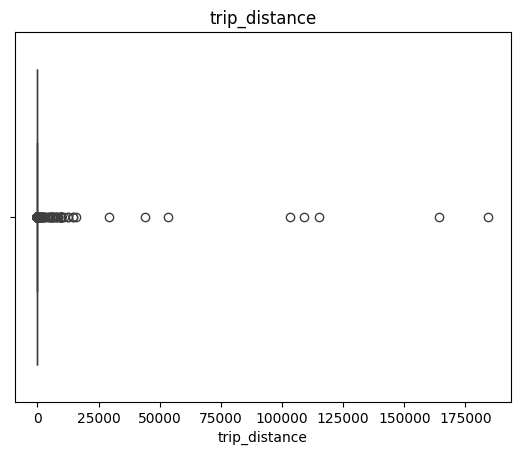

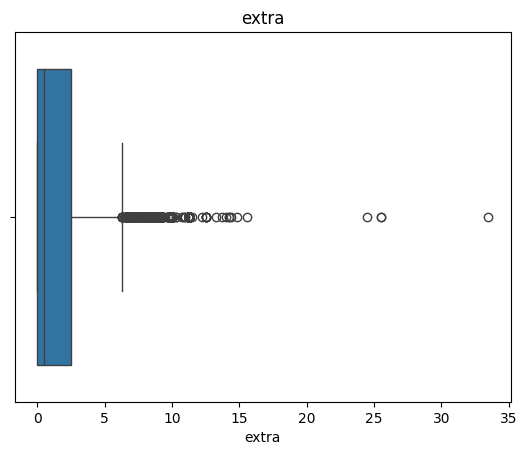

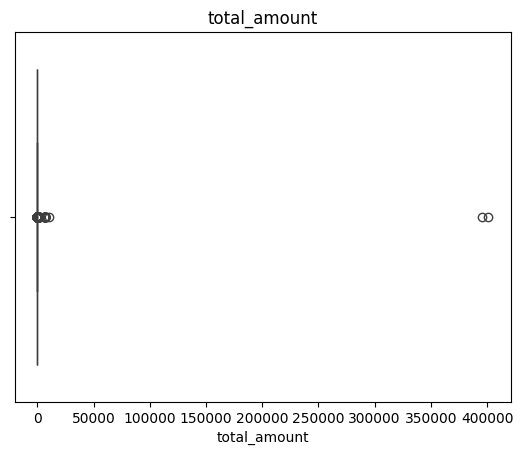

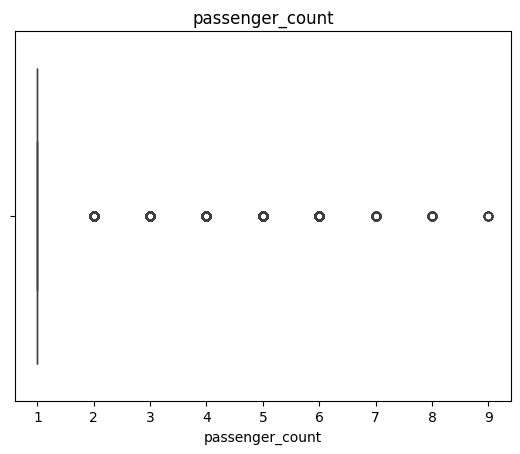

In [14]:
# Plot boxplots for numeric features to identify outliers
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ["trip_duration", "trip_distance", "extra", "total_amount", "passenger_count"]

plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [17]:
# Remove outliers based on 1st and 99th percentiles
lower_bounds = df.quantile(0.01)
upper_bounds = df.quantile(0.99)

for col in numeric_cols:
    df = df[(df[col] >= lower_bounds[col]) & (df[col] <= upper_bounds[col])]
    
df.shape

(35169042, 9)

In [18]:
# Save cleaned data to a new csv file
df.to_csv('nytaxi2022_cleaned.csv', index=False)